<a href="https://colab.research.google.com/github/Um-king/orm/blob/main/%5B%EB%AA%A8%EB%91%90%EC%97%B0%5D_%EB%A8%B8%EC%8B%A0%EB%9F%AC%EB%8B%9D_DF_RF.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# DF/ RF
- DF: Decision Tree 의사결정 나무
- RF: Random Forest 랜덤 포레스트

# 데이터 호출 및 데이터 분류
- 확인하기 위한 csv 파일을 호출한다.
- 모델에 학습시키기 위한 데이터를 분류한다.

In [14]:
## 기본 패키지 모음
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

## 전처리 및 모델링 준비를 위한 패키지
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.model_selection import train_test_split

## 실제 모델링을 위한 패키지
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB

from sklearn import tree
from sklearn.ensemble import RandomForestClassifier


## 모델 평가를 위한 패키지
from sklearn.metrics import classification_report
from sklearn import metrics

In [15]:
# 1. data import

# 다운받은 데이터를 코랩에서 불러오겠습니다.
wine = pd.read_csv('/content/winequality_red.csv')
wine

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5
1,7.8,0.880,0.00,2.6,0.098,25.0,67.0,0.99680,3.20,0.68,9.8,5
2,7.8,0.760,0.04,2.3,0.092,15.0,54.0,0.99700,3.26,0.65,9.8,5
3,11.2,0.280,0.56,1.9,0.075,17.0,60.0,0.99800,3.16,0.58,9.8,6
4,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5
...,...,...,...,...,...,...,...,...,...,...,...,...
1594,6.2,0.600,0.08,2.0,0.090,32.0,44.0,0.99490,3.45,0.58,10.5,5
1595,5.9,0.550,0.10,2.2,0.062,39.0,51.0,0.99512,3.52,0.76,11.2,6
1596,6.3,0.510,0.13,2.3,0.076,29.0,40.0,0.99574,3.42,0.75,11.0,6
1597,5.9,0.645,0.12,2.0,0.075,32.0,44.0,0.99547,3.57,0.71,10.2,5


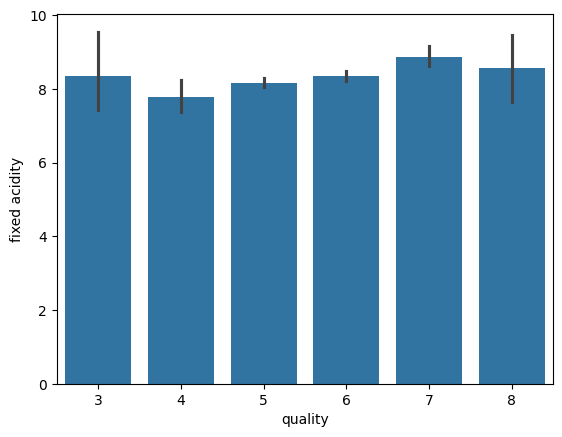

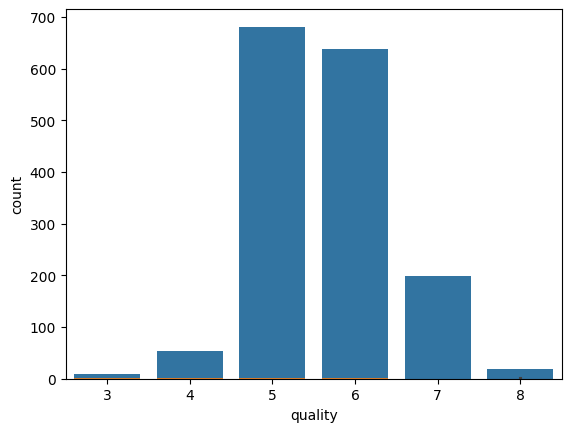

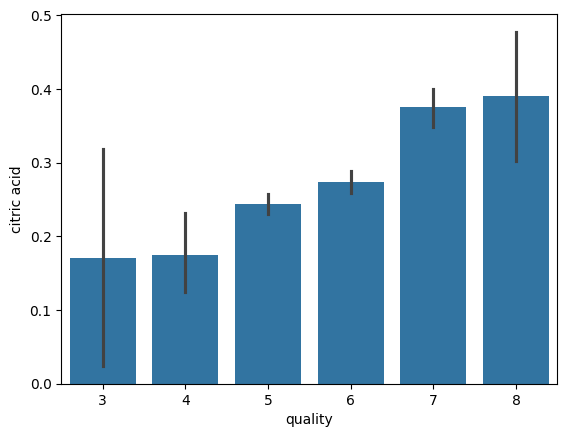

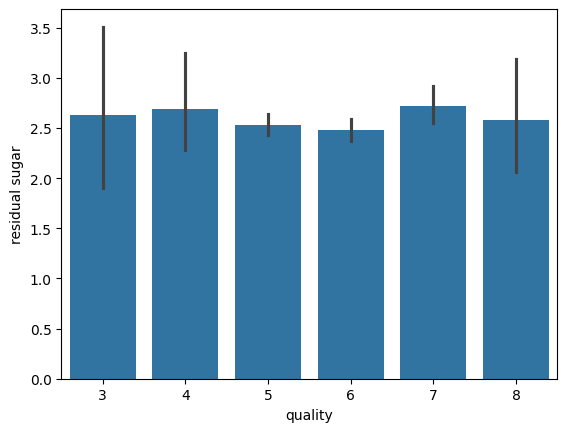

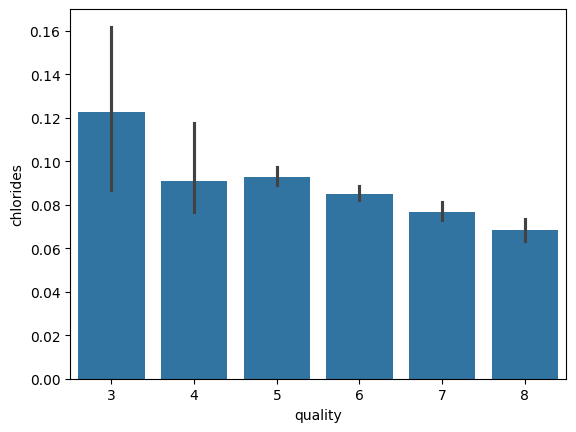

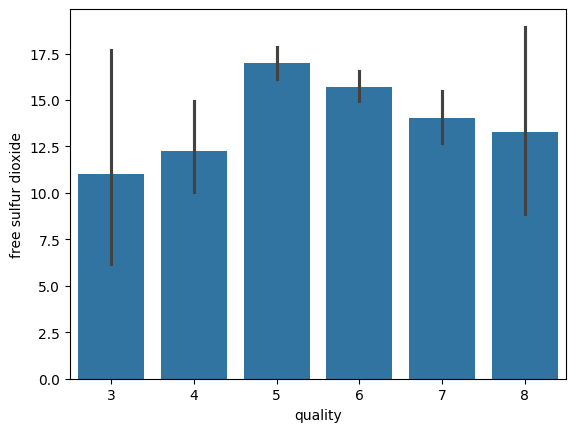

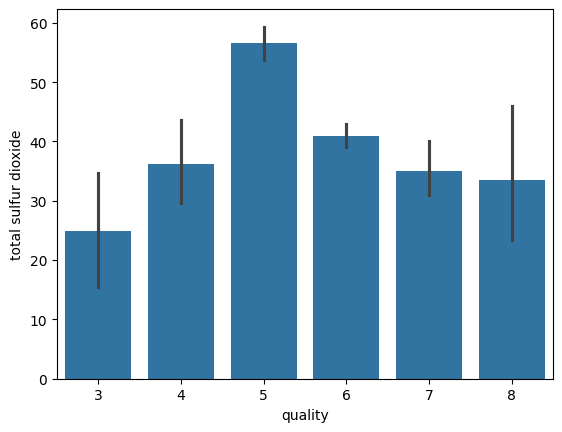

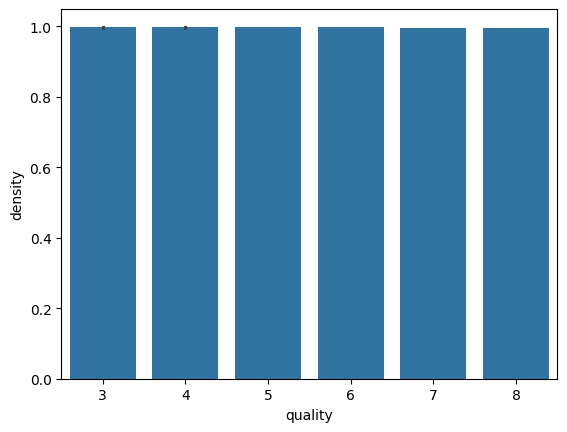

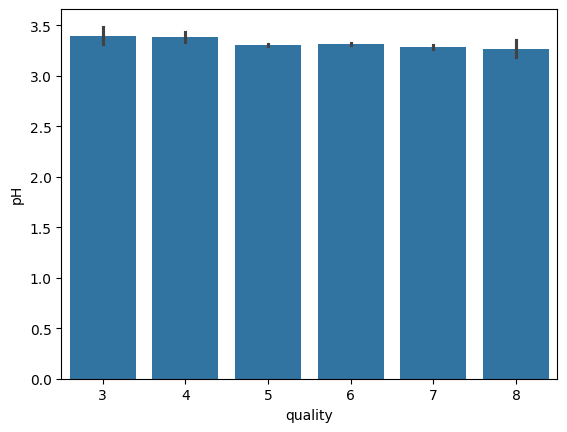

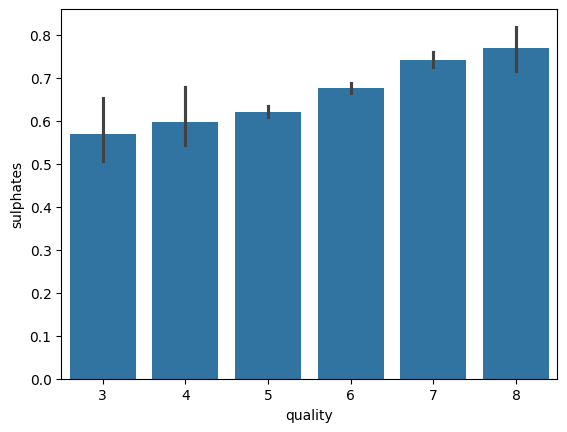

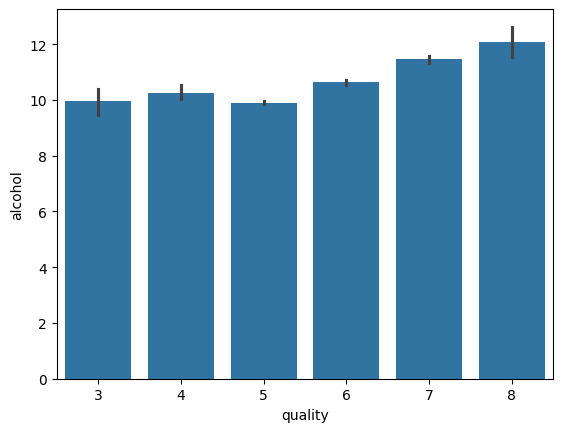

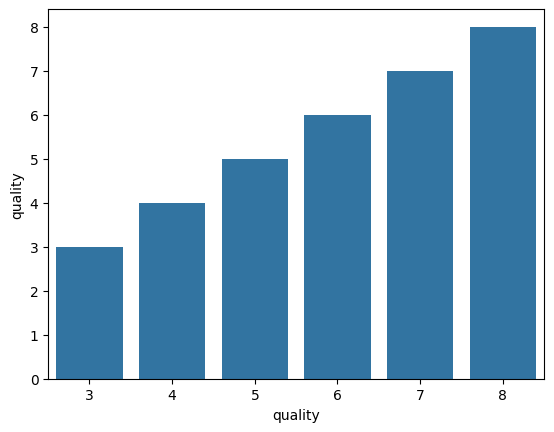

In [16]:
# 2. data 확인

wine.describe()
wine.isnull().sum()
wine['quality'].unique()
sns.countplot(x='quality', data=wine)

# 특성별도 데이터를 시각화 하여 데이터에 대한 정보를 파악합니다
df1 = wine.select_dtypes([int, float])

for i, col in enumerate(df1.columns):
    plt.figure(i)
    sns.barplot(x='quality', y =col, data=df1)

# 그래프를 보고 어느정도 예상이 되야한다
# 해당 값에 대한 퀄리티 그래프가 비슷하면 해당 속성으로는 판별이 어렵겠구나.. -> 비슷한 결과라
# 예 fixed acidity는 그래프가 균일하니 판별이 어려울 수 있고 해당 속성으로는 구분이 어렵구나라고 생각
# sulphates는 차이가 있으니 해당 속성으로는 어느정도 판별이 되겠구나 라고 생각해야한다.

In [6]:
wine.describe()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
count,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000
mean,8.319637,0.527821,0.270976,2.538806,0.087467,15.874922,46.467792,0.996747,3.311113,0.658149,10.422983,5.636023
std,1.741096,0.179060,0.194801,1.409928,0.047065,10.460157,32.895324,0.001887,0.154386,0.169507,1.065668,0.807569
min,4.600000,0.120000,0.000000,0.900000,0.012000,1.000000,6.000000,0.990070,2.740000,0.330000,8.400000,3.000000
25%,7.100000,0.390000,0.090000,1.900000,0.070000,7.000000,22.000000,0.995600,3.210000,0.550000,9.500000,5.000000
50%,7.900000,0.520000,0.260000,2.200000,0.079000,14.000000,38.000000,0.996750,3.310000,0.620000,10.200000,6.000000
75%,9.200000,0.640000,0.420000,2.600000,0.090000,21.000000,62.000000,0.997835,3.400000,0.730000,11.100000,6.000000
max,15.900000,1.580000,1.000000,15.500000,0.611000,72.000000,289.000000,1.003690,4.010000,2.000000,14.900000,8.000000


In [7]:
wine.isnull().sum()

fixed acidity           0
volatile acidity        0
citric acid             0
residual sugar          0
chlorides               0
free sulfur dioxide     0
total sulfur dioxide    0
density                 0
pH                      0
sulphates               0
alcohol                 0
quality                 0
dtype: int64

In [8]:
# 타켓 -> 우리가 예측해야하는 변수 or 분류해야하는 변수

# 유니크한 값을 확인하여 정답 데이터로 활용
wine['quality'].unique()

array([5, 6, 7, 4, 8, 3])

In [ ]:
# 분류 -> 좋으냐 나쁘냐 2가지중 1개 선택 (예측은 이게 더 쉽게 선택할 수 있다 -> 따라서 분류모델로 만들어진 모델이 많다)
# 회귀 -> 집값 연속적인 값 0원~1억 -> 이중에 얼마인지 예측
# 회귀 -> 분류 0원 5천만원 -> 집값이 낮다 / 5천~1억 집값 높다 -> 분류

In [17]:
## 6.5점을 기준으로 좋은 와인과 나쁜 와인을 구분하겠다고 선언
bins = (2, 6.5, 8)
group_names = ['bad', 'good']
wine['quality'] = pd.cut(wine['quality'], bins = bins, labels = group_names) # wine의 quality 값 변경

wine # 퀄리티가 2, 3 같은 값이 아닌 bad와 good으로 변경 -> 점수로 되어있는 부분을 기준을 잡고 좋은품질인지 나쁜품질인지 구분

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,bad
1,7.8,0.880,0.00,2.6,0.098,25.0,67.0,0.99680,3.20,0.68,9.8,bad
2,7.8,0.760,0.04,2.3,0.092,15.0,54.0,0.99700,3.26,0.65,9.8,bad
3,11.2,0.280,0.56,1.9,0.075,17.0,60.0,0.99800,3.16,0.58,9.8,bad
4,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,bad
...,...,...,...,...,...,...,...,...,...,...,...,...
1594,6.2,0.600,0.08,2.0,0.090,32.0,44.0,0.99490,3.45,0.58,10.5,bad
1595,5.9,0.550,0.10,2.2,0.062,39.0,51.0,0.99512,3.52,0.76,11.2,bad
1596,6.3,0.510,0.13,2.3,0.076,29.0,40.0,0.99574,3.42,0.75,11.0,bad
1597,5.9,0.645,0.12,2.0,0.075,32.0,44.0,0.99547,3.57,0.71,10.2,bad


In [18]:
## Good/Bad는 인식할 수 없음. 따라서 이를 인식할 수 있도록 Label Encoding을 실시

# good과 bad의 값을 0과 1로 변경
label_quality = LabelEncoder()
wine['quality'] = label_quality.fit_transform(wine['quality'])

In [19]:
wine

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,0
1,7.8,0.880,0.00,2.6,0.098,25.0,67.0,0.99680,3.20,0.68,9.8,0
2,7.8,0.760,0.04,2.3,0.092,15.0,54.0,0.99700,3.26,0.65,9.8,0
3,11.2,0.280,0.56,1.9,0.075,17.0,60.0,0.99800,3.16,0.58,9.8,0
4,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,0
...,...,...,...,...,...,...,...,...,...,...,...,...
1594,6.2,0.600,0.08,2.0,0.090,32.0,44.0,0.99490,3.45,0.58,10.5,0
1595,5.9,0.550,0.10,2.2,0.062,39.0,51.0,0.99512,3.52,0.76,11.2,0
1596,6.3,0.510,0.13,2.3,0.076,29.0,40.0,0.99574,3.42,0.75,11.0,0
1597,5.9,0.645,0.12,2.0,0.075,32.0,44.0,0.99547,3.57,0.71,10.2,0


In [20]:
##종속변수와 독립변수를 나누어주는 작업
x = wine.drop('quality', axis = 1)
y = wine['quality'] # 유니크한 값으로 정답에 정확도를 확인 -> 학습에 사용되지 않은 고유한 값

## 변수별로 Train과 Test 쓸 데이터 셋을 분류x
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.2, random_state = 42) # 테스트 데이터는 20% 설정(test_size)


## 측정 지표의 표준화.
sc = StandardScaler()
x_train = sc.fit_transform(x_train)
x_test = sc.fit_transform(x_test)

# 학습 데이터와 정답 데이터를 분류
# 그다음 작업으로는 모델을 생성하여 어떤 모델의 정확도가 높은지 확인

#  모델 학습을 위한 준비 및 모델 학습
- 다른 모델들을 학습하여 정확도를 비교한다.
- 각각의 모델들의 정확도를 비교하여 좋은 모델이 존재하는지 확인하기 위해 여러 모델을 테스트한다.-> 위까지 학습데이터와 정답데이터를 분류하는 작업을 실시 아래 코드부터 각각의 모델을 생성하여 정확도 확인
- 해당 예시는 결과적으로 랜덤포레스트 모델을 활용했을 때 정확도가 가장 높게 나왔다.


## 1. 로지스틱 회귀

In [ ]:
## 로지스틱 회귀
model = LogisticRegression()
model.fit(x_train, y_train)
y_pred = model.predict(x_test)
print(classification_report(y_test, y_pred))

print("Accuracy:", metrics.accuracy_score(y_test, y_pred))
print("Precision:", metrics.precision_score(y_test, y_pred))
print("Recall:", metrics.recall_score(y_test, y_pred))

## 2. Support Vector Machine

In [ ]:
## SVC
model_svc = SVC()
model_svc.fit(x_train, y_train)
y_pred_svc = model_svc.predict(x_test)
print(classification_report(y_test, y_pred_svc))

print("Accuracy:", metrics.accuracy_score(y_test, y_pred_svc))
print("Precision:", metrics.precision_score(y_test, y_pred_svc))
print("Recall:", metrics.recall_score(y_test, y_pred_svc))

## 3. KNN

In [ ]:
## KNN
model_knn = KNeighborsClassifier(5)
model_knn.fit(x_train, y_train)
y_pred_knn = model_knn.predict(x_test)
print(classification_report(y_test, y_pred_knn))

print("Accuracy:", metrics.accuracy_score(y_test, y_pred_knn))
print("Precision:", metrics.precision_score(y_test, y_pred_knn))
print("Recall:", metrics.recall_score(y_test, y_pred_knn))

## 4. Naive Bayesian

In [ ]:
## NB
model_NB = GaussianNB()
model_NB.fit(x_train, y_train)
y_pred_NB = model_NB.predict(x_test)
print(classification_report(y_test, y_pred_NB))

print("Accuracy:", metrics.accuracy_score(y_test, y_pred_NB))
print("Precision:", metrics.precision_score(y_test, y_pred_NB))
print("Recall:", metrics.recall_score(y_test, y_pred_NB))

## 5. Decision Tree

In [ ]:
## Decision Tree
model_tree = tree.DecisionTreeClassifier()
model_tree.fit(x_train, y_train)
y_pred_tree = model_tree.predict(x_test)
print(classification_report(y_test, y_pred_tree))

print("Accuracy:", metrics.accuracy_score(y_test, y_pred_tree))
print("Precision:", metrics.precision_score(y_test, y_pred_tree))
print("Recall:", metrics.recall_score(y_test, y_pred_tree))

## 6. RandomForest

In [ ]:
## RandomForest
model_rfc = RandomForestClassifier(n_estimators=200)
model_rfc.fit(x_train, y_train)
y_pred_rfc = model_rfc.predict(x_test)
print(classification_report(y_test, y_pred_rfc))

print("Accuracy:", metrics.accuracy_score(y_test, y_pred_rfc))
print("Precision:", metrics.precision_score(y_test, y_pred_rfc))
print("Recall:", metrics.recall_score(y_test, y_pred_rfc))

# 다른 모델들과 비교 하였을 때, 가장 높은 점수가 나왔습니다.
- 다른 모델들의 정확도 출력

In [ ]:
print("Logistic Regression Accuracy:", metrics.accuracy_score(y_test, y_pred))
print("Support Vector Machine Accuracy:", metrics.accuracy_score(y_test, y_pred_svc))
print("KNN Accuracy:", metrics.accuracy_score(y_test, y_pred_knn))
print("Gausian NB Accuracy:", metrics.accuracy_score(y_test, y_pred_NB))
print("Decision Tree Accuracy:", metrics.accuracy_score(y_test, y_pred_NB))
print("Random Forest Accuracy:", metrics.accuracy_score(y_test, y_pred_rfc))

acc_df = pd.DataFrame({'classifier':
                      ['Logistic Regression ',
                       'Support Vector Machine',
                       'KNN',
                       'Gausian NB',
                       'Decision Tree',
                       'Random Forest'],
                      'accuracy':
                      [metrics.accuracy_score(y_test, y_pred),
                       metrics.accuracy_score(y_test, y_pred_svc),
                       metrics.accuracy_score(y_test, y_pred_knn),
                       metrics.accuracy_score(y_test, y_pred_NB),
                       metrics.accuracy_score(y_test, y_pred_tree),
                       metrics.accuracy_score(y_test, y_pred_rfc),
                       ]
                      })

acc_df

# 결정트리
- 위에 정의된, 분류된 데이터를 통해 트리 모델을 생성하여 확인

In [21]:
##종속변수와 독립변수를 나누어주는 작업
x = wine.drop('quality', axis = 1)
y = wine['quality']

## 변수별로 Train과 Test 쓸 데이터 셋을 분류x
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.2, random_state = 42)

from sklearn.tree import DecisionTreeClassifier

dt = DecisionTreeClassifier(random_state = 2023)
dt.fit(x_train, y_train)
print(dt.score(x_train, y_train))
print(dt.score(x_test, y_test))

1.0
0.9


In [ ]:
# 다음처럼 표준화를 하지 않은 데이터를 가지고 학습을 하니
# train은 1, test는 0.9로 거의 모든 것을 맞추는 모델이 된것 같은데요.
# 테스트 성능이 0.1차이가 나기는 하네요. 과적합이 있는것 같습니다.

# 의사결정나무는 시각화자료도 제공합니다.

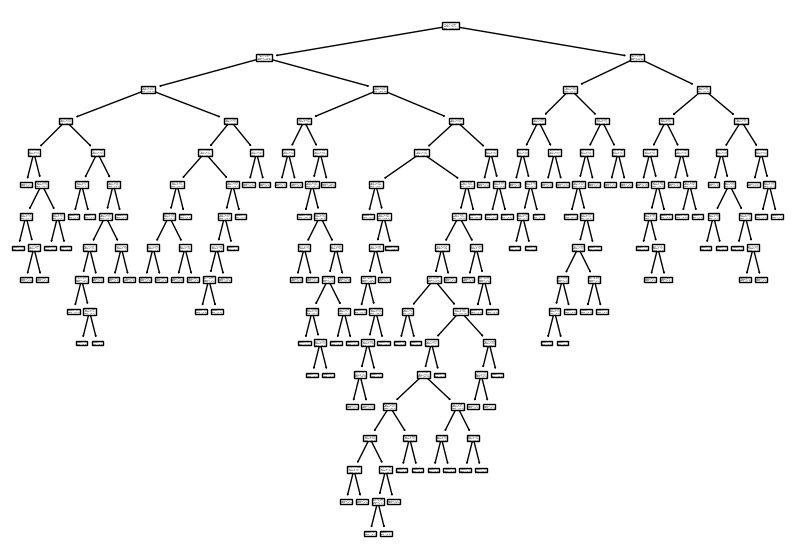

In [22]:
# 트리구조의 시각화 자료 출력

import matplotlib.pyplot as plt
from sklearn.tree import plot_tree
plt.figure(figsize =(10,7))
plot_tree(dt)
plt.show()

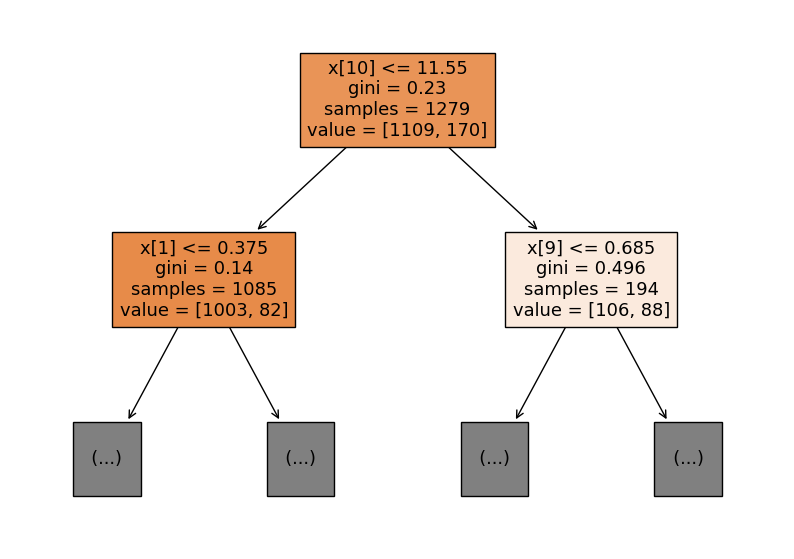

In [23]:
# 위의 어마어마한 트리에서 처음단계를 나누는 것을 살펴보도록 하겠습니다.
# 이 그림을 읽는 방법에 대해 말씀드리려고 합니다.
# - 조건
# - 불순도(gini)
# - 총 샘플 수(samples)
# - 클래스별 샘플(value)

plt.figure(figsize =(10,7))
plot_tree(dt, max_depth = 1, filled = True)
plt.show()

# x[10] <= 11.55 : 조건
# gini = 0.23 : 불순도 -> 컴퓨터가 어떠한 기준으로 11.55에서 자동으로 나누었는지 -> 지니 불순도 = 1 - (타겟이 아닌 클래스 비율의 제곱 + 타겟 클래스 비율의 제곱)
# samples = 1279 : 데이터의 총 수 : 총 샘플수
# value = [1109, 170] : 분류된 데이터의 수 / [0의 개수, 1의 개수] -> [bad의 개수, good의 개수] : 클래스별 샘플

# gini 불순도가 0.5에 가까울수록 불균형에 가까움 -> 50% 가까울수록 안좋은 케이스며, 지니 계수가 0에 가까울수록 좋은 케이스

In [ ]:
# 1번 맨위
# sample 1279개 => 품질 나쁜 음료 (6.5이하) 1109개 -> 퀄리티 값이 0(bad)인 데이터 / 품질이 좋은 음료 (6.5 이상) 170개 -> 퀄리티 값이 1(good)인 데이터
# 알코올 농도가 11.55를 기준으로 왼쪽(품질이 나쁜)과 오른쪽(품질이 좋은)으로 나눠진다.
# 알코올 도수가 11.55도가 넘는가로 구분 -> 1109개가 왼쪽에, 170개가 오른쪽에 표시 [1109, 170]->따라서 각 방향으로 나눠진다.

'''

만약 맨 처음 노드의 지니 불순도를 구한다면
구분            음성 클래스(0)               양성 클래스(1)
                → 6.5이하인 나쁜와인        → 6.5점 이상 좋은 와인
전체            1,279                        1,279
클래스 갯수     1,109                        170
클래스/전체     86.7%                        13.3%
제곱            75.2%                        1.8%
지니계수        23.0% → 0.23
'''

# 클래스/전체 값 = 1109 / 1279 (클래스 갯수 / 전체)
# 제곱 값 = 0.867의 제곱,  0.133의 제곱
# 지니계수 = 1 - (음성클래스의 제곱값 + 양성클래스의 제곱값) = 100 - (75.2 + 1.8) = 0.23